In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/sea-level/epa-sea-level.csv')

In [3]:
df = df.dropna(subset=['NOAA Adjusted Sea Level'])
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291339,6.027559,6.555118,6.297493
114,1994,6.500000,6.236220,6.763780,6.310934
115,1995,6.618110,6.354331,6.881890,6.452569
116,1996,6.787402,6.523622,7.051181,6.627631
117,1997,7.066929,6.803150,7.330709,6.733920


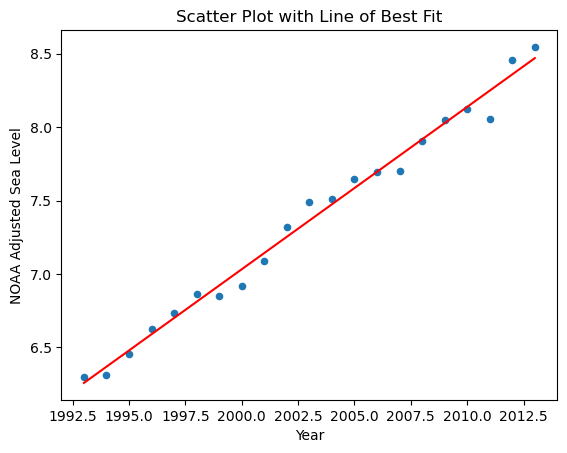

In [4]:
df = df.dropna(subset=['NOAA Adjusted Sea Level'])
x = df['Year']
y = df['NOAA Adjusted Sea Level']


df.plot(kind='scatter', x='Year', y='NOAA Adjusted Sea Level')


res = linregress(x, y)
intercept = res.intercept
slope = res.slope
line = slope * x + intercept
plt.plot(x, line, color='red')

plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level')
plt.title('Scatter Plot with Line of Best Fit')

last = df['Year'].max() + 37




plt.show()

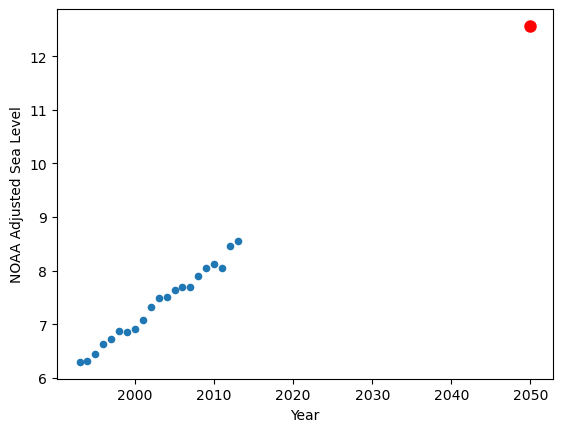

In [5]:
df.plot(kind='scatter', x='Year', y='NOAA Adjusted Sea Level')
buduci = slope * last + intercept
plt.plot(last, buduci, marker='o', markersize=8, color='red')

In [6]:
from sklearn.model_selection import train_test_split
x = df['Year'].values.reshape(-1, 1)
y = df['NOAA Adjusted Sea Level'].values
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)



(16, 1) (16,)
(5, 1) (5,)


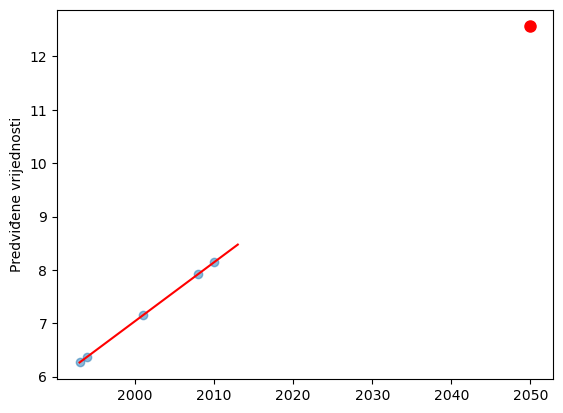

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()

lr.fit(xtrain, ytrain)

ypredvid = lr.predict(xtest)

r2 = r2_score(ytest, ypredvid)
mse = mean_squared_error(ytest, ypredvid)
mae = mean_absolute_error(ytest, ypredvid)

intercept = lr.intercept_

plt.scatter(xtest, ypredvid, alpha=0.5)
plt.plot([x.min(), x.max()], [x.min() * lr.coef_[0] + lr.intercept_, x.max()*lr.coef_[0] + lr.intercept_], color='red')
plt.ylabel("Godina")
plt.ylabel("Predviđene vrijednosti")

future_year = x.max() + 37
future_prediction = lr.predict([[future_year]])
plt.plot(future_year, future_prediction, marker='o', markersize=8, color='red')

In [8]:
import xgboost as xgb
import seaborn as sns

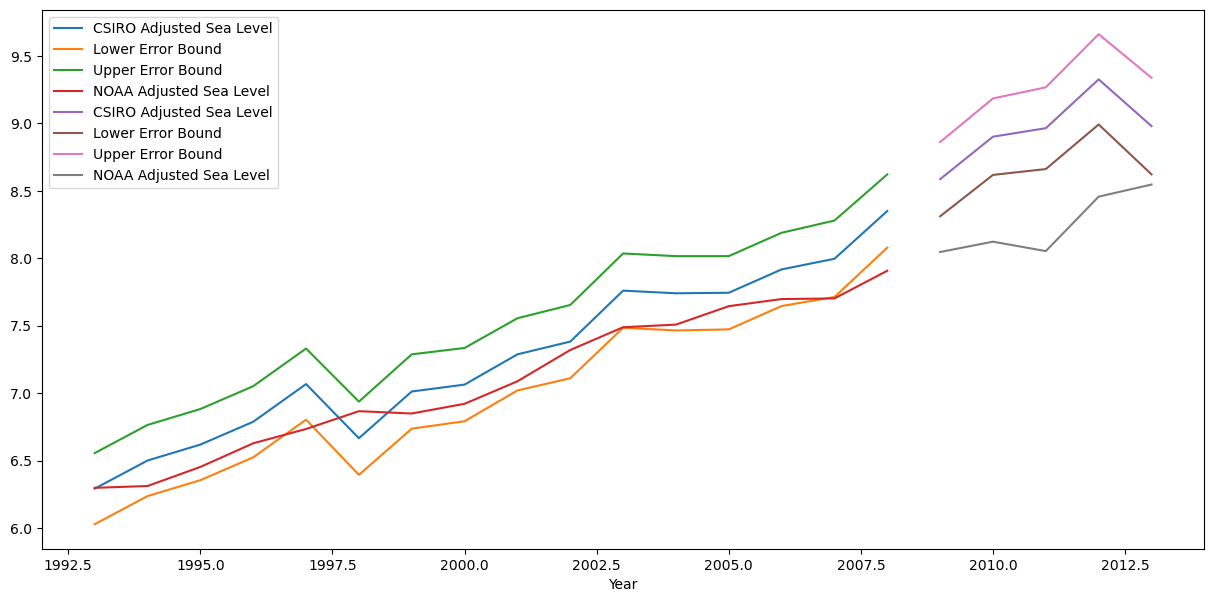

In [9]:
df = df.set_index('Year')
train = df.loc[df.index < 2009]
test = df.loc[df.index >= 2009]

fig, ax = plt.subplots(figsize=(15,7))

train.plot(ax=ax, label='Training')
test.plot(ax=ax, label='test')
plt.show()